In [2]:
import pandas as pd
data =pd.read_csv("student_sleep_study_dataset.csv")

In [3]:
data.head()

,Avg_Sleep_Hours,Bedtime_Hour,Wakeup_Hour,Weekend_Sleep_Variance,Study_Hours_Per_Day,Assignment_On_Time_Rate,Part_Time_Job_Hours,Screen_Time_Before_Bed,GPA
0,7.0,23.9,6.9,2.2,3.8,76.3,2.5,75.4,3.19
1,6.4,0.9,7.3,2.0,2.4,62.6,6.7,64.3,2.49
2,7.1,21.6,4.7,1.5,2.2,74.0,9.6,70.2,3.18
3,8.0,23.6,7.6,1.2,3.0,64.4,2.8,138.5,2.07
4,6.3,22.3,4.6,1.8,2.8,92.3,5.4,18.3,3.77


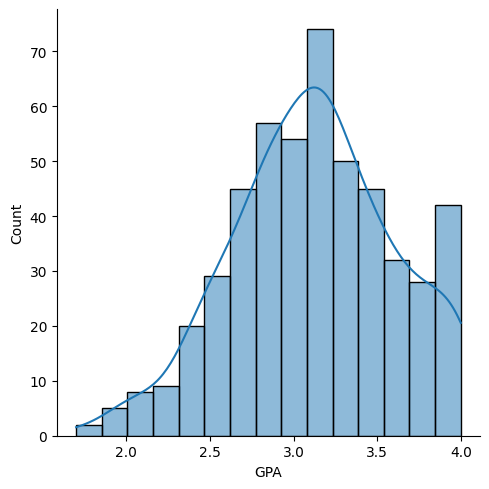

In [ ]:
#it is a graph of frequency distribution of the GPA
import seaborn as sns
sns.displot(data['GPA'], kde=True)

In [5]:
data=data.dropna()
data=data.drop_duplicates()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Avg_Sleep_Hours          500 non-null    float64
 1   Bedtime_Hour             500 non-null    float64
 2   Wakeup_Hour              500 non-null    float64
 3   Weekend_Sleep_Variance   500 non-null    float64
 4   Study_Hours_Per_Day      500 non-null    float64
 5   Assignment_On_Time_Rate  500 non-null    float64
 6   Part_Time_Job_Hours      500 non-null    float64
 7   Screen_Time_Before_Bed   500 non-null    float64
 8   GPA                      500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


In [7]:
data.corr()['GPA'].sort_values(ascending=False)

GPA                        1.000000
Study_Hours_Per_Day        0.539681
Assignment_On_Time_Rate    0.424911
Avg_Sleep_Hours            0.417552
Wakeup_Hour                0.227878
Part_Time_Job_Hours        0.019660
Bedtime_Hour               0.004575
Weekend_Sleep_Variance    -0.052509
Screen_Time_Before_Bed    -0.351698
Name: GPA, dtype: float64

In [14]:
x=pd.DataFrame(data, columns=["Study_Hours_Per_Day","Assignment_On_Time_Rate","Avg_Sleep_Hours" ,"Wakeup_Hour"  ,"Screen_Time_Before_Bed"])
y=pd.DataFrame(data, columns=["GPA"])


In [15]:
x

,Study_Hours_Per_Day,Assignment_On_Time_Rate,Avg_Sleep_Hours,Wakeup_Hour,Screen_Time_Before_Bed
0,3.8,76.3,7.0,6.9,75.4
1,2.4,62.6,6.4,7.3,64.3
2,2.2,74.0,7.1,4.7,70.2
3,3.0,64.4,8.0,7.6,138.5
4,2.8,92.3,6.3,4.6,18.3
...,...,...,...,...,...
495,4.1,76.1,7.0,5.7,61.6
496,3.0,89.5,5.5,6.3,77.2
497,2.1,88.2,6.3,5.9,62.8
498,2.8,76.9,5.6,4.0,28.5


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400, 1)
(100, 1)


In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.intercept_

array([-0.07630564])

In [20]:
model.coef_

array([[ 0.29100709,  0.01971283,  0.22210106, -0.02315348, -0.00973385]])

In [21]:
y_pred=model.predict(x_test)
y_pred[:5]

array([[2.55196363],
       [3.82930935],
       [3.22074487],
       [3.16496935],
       [3.25633912]])

In [22]:
y_pred=pd.DataFrame(y_pred,columns=["predicted"])

In [23]:
y_pred.head()

,predicted
0,2.551964
1,3.829309
2,3.220745
3,3.164969
4,3.256339


In [25]:
df_pred=pd.DataFrame(columns=["actual", "predicted "])
df_pred["actual"]=y_test.reset_index()["GPA"]
df_pred["predicted "]=y_pred["predicted"]
df_pred.head()

,actual,predicted
0,2.86,2.551964
1,3.67,3.829309
2,3.24,3.220745
3,3.34,3.164969
4,3.11,3.256339


In [26]:
#we increased the number of features the error decreased and the r2 increased the model is better
#we can also use the statsmodel library to get more information about the model
from sklearn import metrics
import numpy as np
#the lower the error, the better the model  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# if r2 increases, the model is better
print("R2", metrics.r2_score(y_test, y_pred))


MAE 0.16259318924688543
MSE 0.04044980400748422
RMSE 0.20112136636241368
R2 0.8086913388049095


In [ ]:
# Example: Test the model with your own input values
import pandas as pd

# Replace these values with your own test data
my_input = pd.DataFrame([{
    "Study_Hours_Per_Day": 9,
    "Assignment_On_Time_Rate": 0.9,
    "Avg_Sleep_Hours": 7,
    "Wakeup_Hour": 7,
    "Screen_Time_Before_Bed": 0
}])

# Predict GPA for your input
predicted_gpa = model.predict(my_input)
print("Predicted GPA:", predicted_gpa[0][0])

Predicted GPA: 4.092053650423653


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Sleep_Hours,500.0,6.50960,0.983770,3.3,5.8000,6.50,7.1000,10.4
Bedtime_Hour,500.0,18.99860,8.339520,0.0,21.6750,22.60,23.2000,24.0
Wakeup_Hour,500.0,5.54020,1.336644,1.5,4.7000,5.50,6.4000,11.1
Weekend_Sleep_Variance,500.0,1.55560,0.505628,0.1,1.2000,1.60,1.9000,2.8
Study_Hours_Per_Day,500.0,3.03340,0.985254,0.1,2.4000,3.00,3.7000,6.2
Assignment_On_Time_Rate,500.0,79.91980,11.681274,60.0,70.5500,79.90,90.2250,99.8
Part_Time_Job_Hours,500.0,10.05880,4.893362,-3.7,6.7000,9.80,13.1000,24.9
Screen_Time_Before_Bed,500.0,59.83640,20.734474,0.2,45.3000,60.85,74.4000,138.5
GPA,500.0,3.11968,0.484214,1.7,2.7975,3.13,3.4425,4.0
